In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# 读取图片
filename = 'dog.jpg';
ori_img = np.array(Image.open(filename))

In [3]:
# 取k个奇异值
k = 30

In [4]:
# R通道
u, sigma, v = np.linalg.svd(ori_img[:, :, 0])
r = np.dot(np.dot(u[:,:k], np.eye(k) * sigma[:k]), v[:k,:])
r[r<0]=0
r[r>255]=255
r=np.rint(r).astype("uint8")

In [5]:
# G通道
u, sigma, v = np.linalg.svd(ori_img[:, :, 1])
g = np.dot(np.dot(u[:,:k], np.eye(k) * sigma[:k]), v[:k,:])
g[g<0]=0
g[g>255]=255
g=np.rint(g).astype("uint8")

In [6]:
# B通道
u, sigma, v = np.linalg.svd(ori_img[:, :, 2])
b = np.dot(np.dot(u[:,:k], np.eye(k) * sigma[:k]), v[:k,:])
b[b<0]=0
b[b>255]=255
b=np.rint(b).astype("uint8")

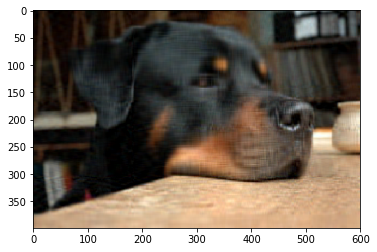

In [7]:
# 合并RGB通道，生成图片
new_img = np.stack((r, g, b), 2)
plt.imshow(new_img)